In [1]:
using Plots

include("src/PolyColloid.jl")
using .PolyColloid

In [2]:
colloid = colloid(144, 4, 1 / √2, (20, 20))
crystal_initialize!(colloid, 12, (20/12, 20/12), (20/24, 20/24))

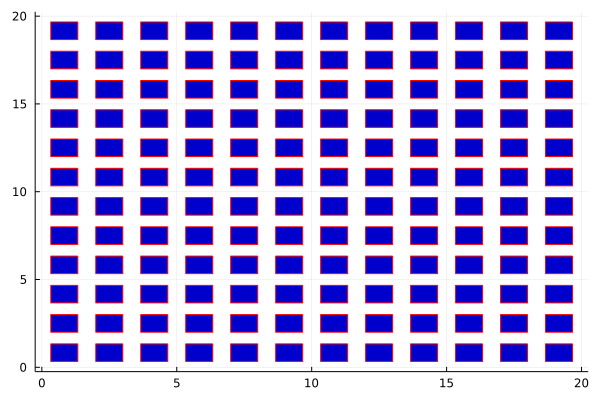

In [3]:
plot(colloid, legend=false)

In [4]:
simulate!(colloid, 0.4, π/2; steps = 1000)
simulate!(colloid, 0.4, π/2; steps = 1000)

(0.566990291262136, 0.8288659793814434)

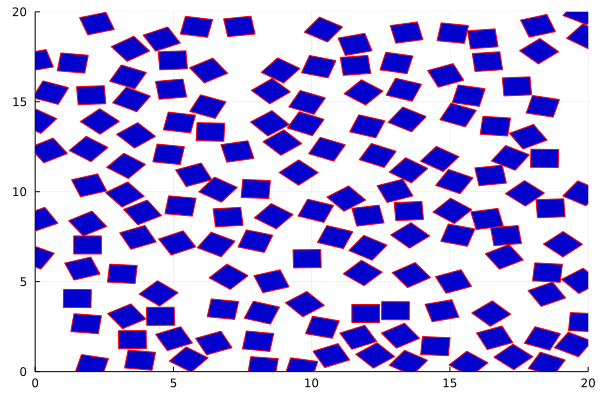

In [6]:
plot(colloid, legend=false, xlim=(0, 20), ylim=(0, 20))